<a href="https://colab.research.google.com/github/dishachopra/SRIP2023/blob/main/Fr%C3%A9chet_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I implemented inverse CDF sampling for the Fréchet distribution. Also i drew its pdf. I did this using numpy 
1. created a sequence of linearly spaced numbers for the x-axis of the plot using np.linspace().
2. Calculated the probability density function ousing np.exp() and np.power().
3. Generate 10,000 uniform random numbers using np.random.uniform().
4. Applied the inverse CDF function using frechet_inverse_cdf().
5. Calculate the CDF using np.exp() and np.power().

Matplotlib was used to plot the functions








In [53]:
import numpy as np
import matplotlib.pyplot as plt

The Fréchet distribution is a probability distribution that is used in extreme value theory to model the distribution of the maximum value in a sample of random variables. it is used in analysis of extreme events, such as floods, earthquakes, and other natural disasters, where the maximum value of a quantity is of interest. 

It can be got from Weibull distribution by taking the limit when scale paarameter approaches infinity(so also known as inverse weibull distribution).

This is the probability distribution function where alpha is shape parameter and beta is scale parameter both are positive
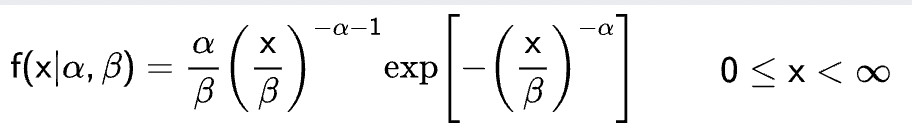

In [54]:
alpha = 2.0
beta = 1.0

The inverse CDF function for a probability distribution is the function that maps a probability value p to the corresponding quantile or value of the random variable that has that probability of being less than or equal to it.It can be obtained by solving x in terms of p.

Here we define the inverse CDF function for the Fréchet distribution

In [55]:
def frechet_inverse_cdf(p):
    return  beta * ((-np.log(p))**(-1/alpha))

This is the essence step for inverse cdf sampling. This step generates random values from the Fréchet distribution using inverse CDF sampling. The method works by generating uniform random values between 0 and 1, and then applying the inverse CDF function of the Fréchet distribution(found above) to transform these values into values that follow the Fréchet distribution.

Here we generate random samples from the Fréchet distribution using inverse CDF sampling

In [56]:
n_values = 10000
rng = np.random.default_rng(seed=42)
uniform_values = rng.uniform(size=n_values)
frechet_inverse_cdf_values = frechet_inverse_cdf(uniform_values)

Here we plot the pdf of function. 

Let's try to understand what exactly is this!
This is a type of datascience method for taking a certain distribution(here we have taken a uniform distribution, histogram plotted below) doing some transformation on it and turning it into a desired different distribution. On doing simple math we figure F(x) cumulative distribution function is invese of desired function T, the tranformation. So to find the tranformation function for any distribution we find the inverse of its cdf.

In this way from a uniform sample we took values which resulted in a desired distribution(we can apply this to get exponential, gaussian etc)

<ipython-input-57-6f765f57f57b>:2: RuntimeWarning: divide by zero encountered in power
  pdf = alpha*(x)**(-alpha-1)*np.exp(-((x)/beta)**(-alpha))
<ipython-input-57-6f765f57f57b>:2: RuntimeWarning: invalid value encountered in multiply
  pdf = alpha*(x)**(-alpha-1)*np.exp(-((x)/beta)**(-alpha))


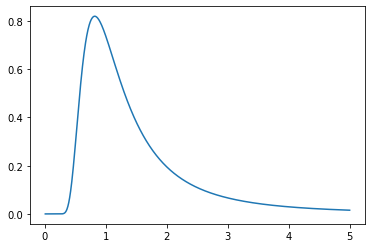

In [57]:
x = np.linspace(0, 5, 1000)
pdf = alpha*(x)**(-alpha-1)*np.exp(-((x)/beta)**(-alpha))
plt.plot(x, pdf, label='PDF')

Here we plot the histogram of uniform value samples, it is approximately uniform

(array([0.95532233, 1.07536283, 1.06035776, 0.9253122 , 0.91030714,
        1.06535945, 1.06535945, 1.04035101, 1.0853662 , 1.0053392 ,
        1.0053392 , 0.93531557, 1.11037464, 1.03034764, 0.95032064,
        0.95532233, 1.0453527 , 0.94531895, 1.01034089, 1.02034426,
        0.98533245, 1.0453527 , 0.97532908, 0.98533245, 0.90530545,
        1.06035776, 1.03034764, 1.0053392 , 0.99533583, 1.07036114,
        1.01534258, 0.97032739, 1.13038139, 0.94031726, 0.99533583,
        1.0053392 , 0.93531557, 1.0453527 , 0.93031389, 1.02034426,
        0.96032401, 0.97032739, 1.02034426, 0.98533245, 0.91030714,
        1.00033751, 0.94531895, 0.98533245, 0.96032401, 1.03534933]),
 array([3.14419644e-04, 2.03076717e-02, 4.03009237e-02, 6.02941757e-02,
        8.02874277e-02, 1.00280680e-01, 1.20273932e-01, 1.40267184e-01,
        1.60260436e-01, 1.80253688e-01, 2.00246940e-01, 2.20240192e-01,
        2.40233444e-01, 2.60226696e-01, 2.80219948e-01, 3.00213200e-01,
        3.20206452e-01, 3.4019

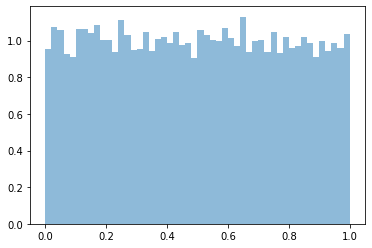

In [58]:
plt.hist(uniform_values, density=True, bins=50, alpha=0.5, label='Samples')
